# Blue Sky Real Estate Dataset (EDA) And Price Predictor

BY - PRANSH GUPTA ( E20CSE165 ) __ ( EB10 )

Objective 1 --> Identification and Pattern Study of Variables.

Objective 2 --> Finding best model for Price Range predictions.

In [1]:
import pandas as pd

In [2]:
housing_df = pd.read_csv("data.csv")

In [3]:
housing_df.head()                                                  # Understansing data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing_df.info()                                                  # Checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing_df.size

7084

In [6]:
housing_df.shape

(506, 14)

In [7]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

BAR GRAPH of MEAN showing -- Few variables exists in a completely different scale than rest, hence require Scaling

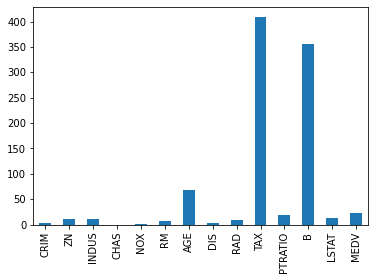

In [9]:
import matplotlib.pyplot as plt
housing_df.describe().loc["mean"].plot.bar()       
plt.show()

HISTOGRAM of entire data set.

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

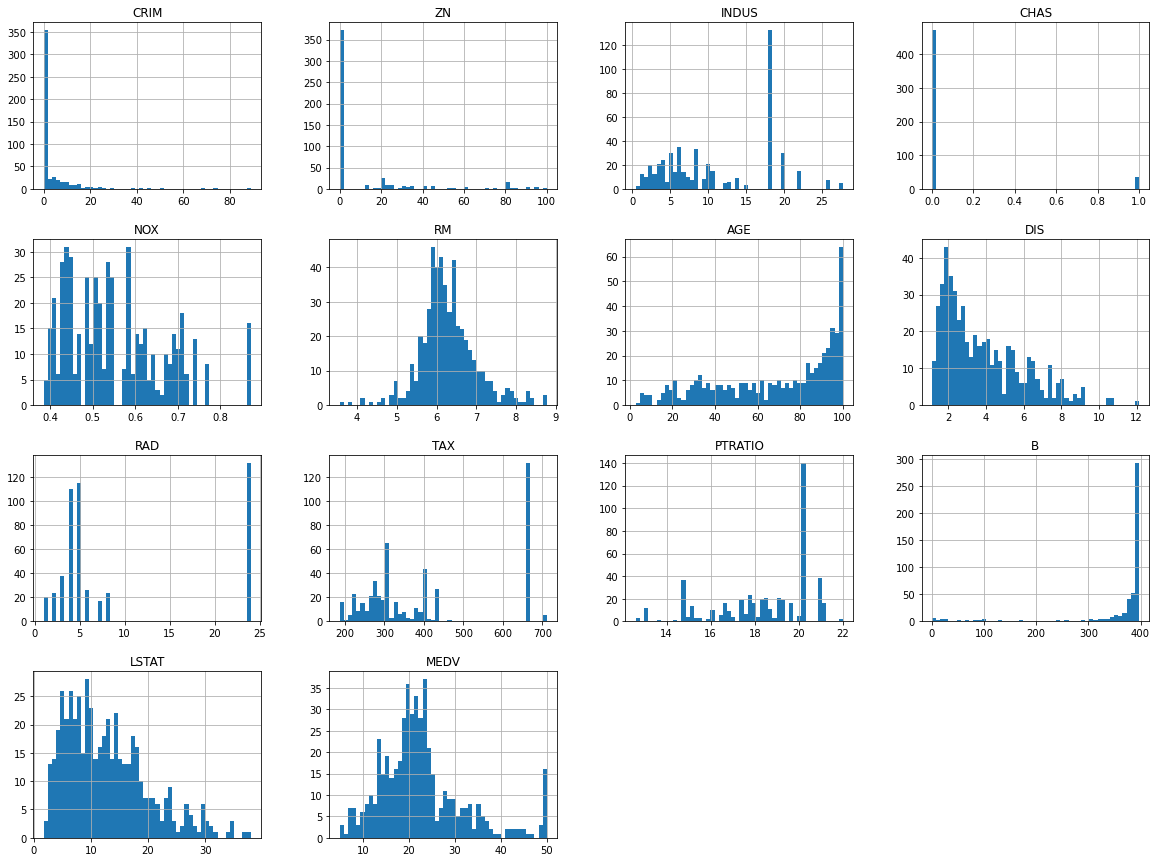

In [10]:
housing_df.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing_df, test_size = 0.2, random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



TRAIN DATA > TEST DATA __ 80:20

In [12]:
housing_df['CHAS'].value_counts() # Categorical Value (0 or 1)

0    471
1     35
Name: CHAS, dtype: int64

!! Stratified Shuffle Split

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing_df, housing_df['CHAS']):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]

In [14]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
housing_df = strat_train_set.copy()

## Looking For Correlations

In [17]:
corr_matrix = housing_df.corr()                                 # MEDV = Median value of owner-occupied homes in $1000's
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

## *Scatter Plot 

Scatter Plot of RM(+) and LSTAT(-) which have the most correlation with Pricing (MEDV) compared to the rest.

I have used Scatter Plot, for easy removal of Outlets ( in future ).

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

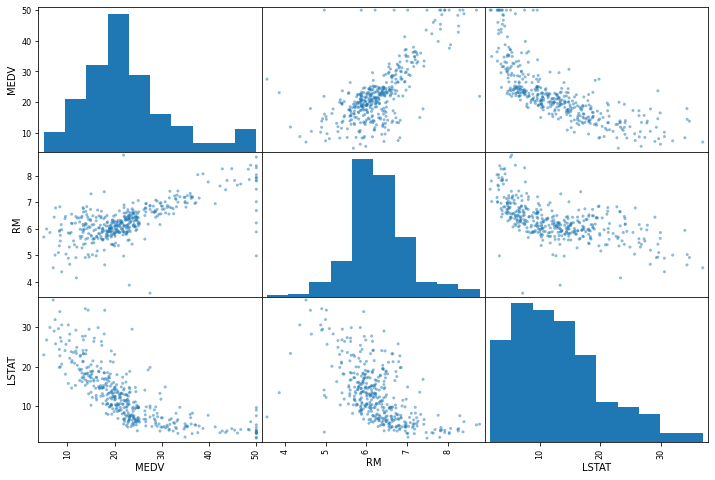

In [18]:
from pandas.plotting import scatter_matrix
attr = ["MEDV", "RM" , "LSTAT"]
scatter_matrix(housing_df[attr], figsize = (12,8))

## ** Kernel Density Estimation

For better understand of high +ve correlation b/w RM and MEDV. 

Showing more no. of houses having ROOMS b/w 5.5 and 7 in PRICE Range of 15 to 25 USD.

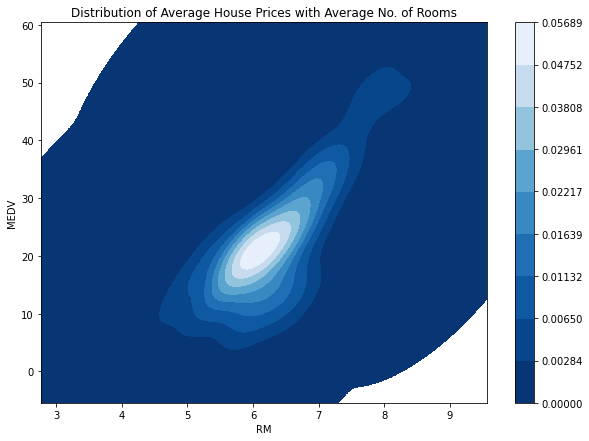

In [19]:
import seaborn as sns
fig, my_plot = plt.subplots(figsize = (10,7))
my_plot = sns.kdeplot(x = "RM", y = "MEDV", data = housing_df , fill = True, cbar = True, color = "m", cmap = "Blues_r", thresh = 0)
my_plot.set_title("Distribution of Average House Prices with Average No. of Rooms")
plt.show()

## ***Creating additional Column / Variable for better analysis of Dataset

In [20]:
housing_df["TAXRM"] = housing_df['TAX']/housing_df['RM']           # A new attribute based on TAX and No. of Rooms

In [21]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [22]:
corr_matrix = housing_df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

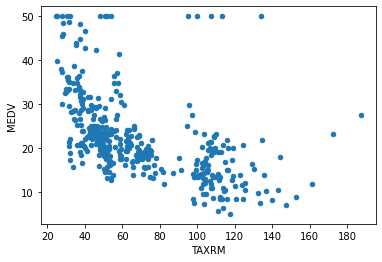

In [23]:
housing_df.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=1)

## ****CHAS ( a categorical variable ) 

Swarm Graph Based on CHAS ( i.e. distance from Charles River), showing very few housing units near river(1).

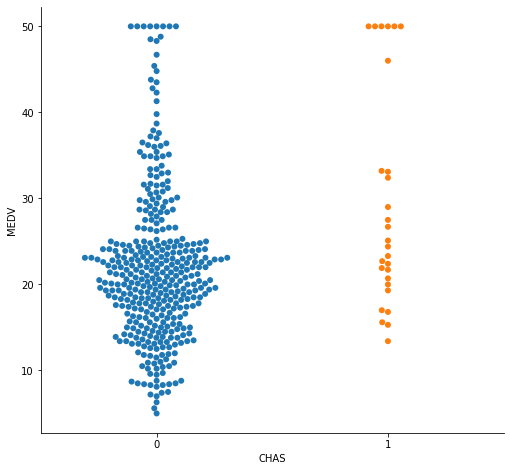

In [24]:
import seaborn as sns
my_plot = sns.catplot(y="MEDV",x="CHAS", data= housing_df, kind = "swarm", alpha = 1, s = 6, height = 7)
my_plot.fig.subplots_adjust(top = 0.9)
plt.show()

We can also further observe that houses near Charles River are more expensive than those which are more inland using a VIOLIN PLOT.

Where we can easily observe Two Peaks in CHAS(1) at a higher price range.

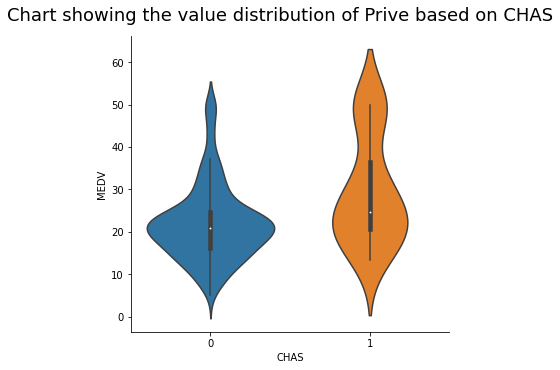

In [25]:
my_plot = sns.catplot(y="MEDV",x="CHAS", data= housing_df, kind = "violin", alpha = 1, s = 5)
my_plot.fig.suptitle("Chart showing the value distribution of Prive based on CHAS", fontsize = 18)
my_plot.fig.subplots_adjust(top = 0.9)
plt.show()

## *****Brief View of Relationship b/w all Variables

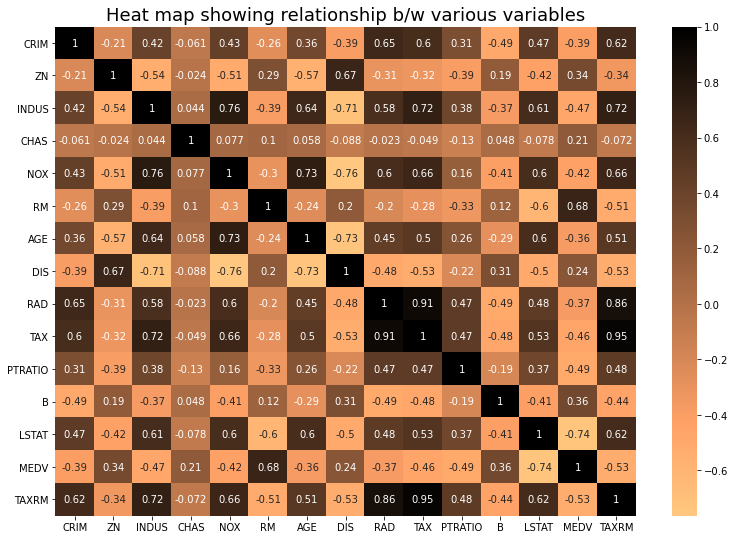

In [26]:
fig, ax = plt.subplots(figsize = (13,9))
sns.heatmap(corr_matrix, annot = True, annot_kws = {"size":10},cmap = "copper_r").set_title("Heat map showing relationship b/w various variables",fontsize = 18)
plt.show()

Darker the box, more the corrleation

In [27]:
housing_df = strat_train_set.drop("MEDV", axis=1)           # LABEL Attribute
housing_df_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [28]:
median = housing_df["RM"].median()

In [29]:
housing_df["RM"].fillna(median)          # The original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [30]:
housing_df.shape

(404, 13)

In [31]:
housing_df.describe() # before start filling the missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_df)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
X = imputer.transform(housing_df)

In [35]:
housing_df_tr = pd.DataFrame(X, columns=housing_df.columns)

In [36]:
housing_df_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating a Pipeline

Scaling of data using STANDARDIZATION

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [38]:
housing_df_new_tr = my_pipeline.fit_transform(housing_df)

In [39]:
housing_df_new_tr.shape

(404, 13)

## Selecting a desired model

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_df_new_tr, housing_df_labels)

RandomForestRegressor()

In [41]:
some_data = housing_df.iloc[:5]

In [42]:
some_labels = housing_df_labels.iloc[:5]

In [43]:
prepared_data = my_pipeline.transform(some_data)

In [44]:
model.predict(prepared_data)

array([22.514, 25.169, 16.529, 23.281, 23.436])

In [45]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

1. Root Mean Square Error

In [46]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_df_new_tr)
mse = mean_squared_error(housing_df_labels, housing_predictions)
rmse = np.sqrt(mse)

In [47]:
rmse                                # % error

1.27786169919801

2. Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_df_new_tr, housing_df_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [49]:
rmse_scores

array([2.84522155, 2.86076962, 4.42067264, 2.75173363, 3.32604057,
       2.61080865, 4.31233035, 3.3236743 , 3.08270134, 3.34075132])

In [50]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [51]:
print_scores(rmse_scores)

Scores: [2.84522155 2.86076962 4.42067264 2.75173363 3.32604057 2.61080865
 4.31233035 3.3236743  3.08270134 3.34075132]
Mean:  3.2874703958968197
Standard deviation:  0.5919962381983743


## Outputs From Different Models

1. Decision Tree:
    
    Mean:  4.189504502474483
    
    Standard deviation:  0.848096620323756


2. Linear Regression:
    
    Mean:  4.221894675406022
    
    Standard deviation:  0.7520304927151625


3. Random Forest Regression                                 
    
    Mean:  3.3735336426422577                          
    
    Standard deviation:  0.7554964353258897


#BEST MODEL - Random Forest Regression 

## Saving the model

In [52]:
from joblib import dump, load
dump(model, 'Blue Sky.joblib') 

['Blue Sky.joblib']

## Testing the model on Test Data

In [53]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [54]:
final_rmse

2.907828591517569

In [55]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [56]:
from joblib import dump, load
import numpy as np
model = load('Blue Sky.joblib') 
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.514])